In [1]:
!wget https://www.dropbox.com/scl/fi/lm7ussn8j5d1lfnypwpxb/train.zip?dl=1

--2024-09-26 22:51:05--  https://www.dropbox.com/scl/fi/lm7ussn8j5d1lfnypwpxb/train.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'train.zip@dl=1.7'

     0K .......... .......... .......... .......... ..........  323K
    50K .......... .......... .......... .......... ..........  514K
   100K .......... .......... .......... .......... .......... 2.64M
   150K .......... ........                                     103K=0.5s

2024-09-26 22:51:06 (374 KB/s) - 'train.zip@dl=1.7' saved [172574]



In [2]:
import subprocess

subprocess.run(["unzip", "train.zip", "-d", r"C:\Users\asus\Desktop\newfed"])

CompletedProcess(args=['unzip', 'train.zip', '-d', 'C:\\Users\\asus\\Desktop\\newfed'], returncode=9)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy

In [4]:
# Working with pre trained model 

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

In [5]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

In [6]:
# Import necessary libraries
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of ImageDataGenerator
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

# Specify the path to the training dataset
train_dir = os.path.join(os.path.expanduser("~"), "Desktop", "train")

# Check if the path exists
if not os.path.exists(train_dir):
    print("Error: The path does not exist:", train_dir)
else:
    # Create a data generator for the training dataset
    train_data = train_datagen.flow_from_directory(directory=train_dir, 
                                                   target_size=(224,224), 
                                                   batch_size=32,
                                                  )

    # Print the class indices
    print(train_data.class_indices)

Found 29171 images belonging to 7 classes.
{'Angry': 0, 'Disgust': 1, 'Fear': 2, 'Happy': 3, 'Neutral': 4, 'Surprise': 5, 'Unhappy(Sad)': 6}


Found 29171 images belonging to 7 classes.
{'Angry': 0, 'Disgust': 1, 'Fear': 2, 'Happy': 3, 'Neutral': 4, 'Surprise': 5, 'Unhappy(Sad)': 6}


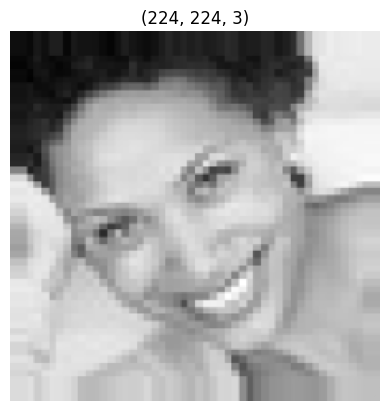

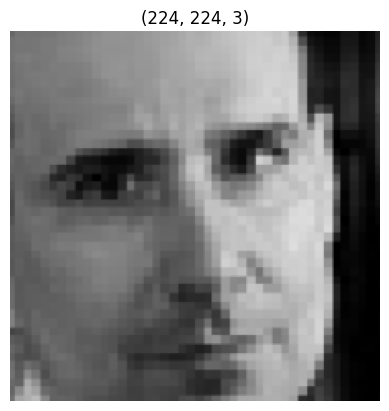

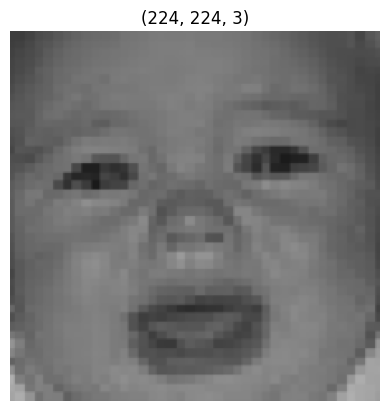

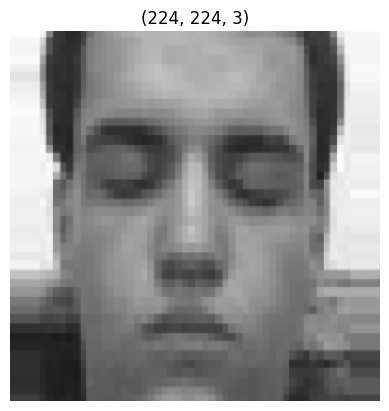

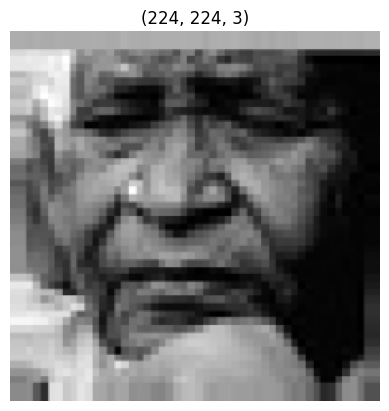

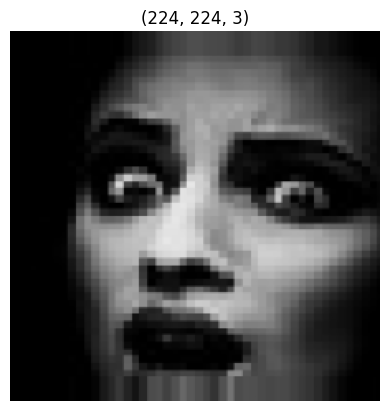

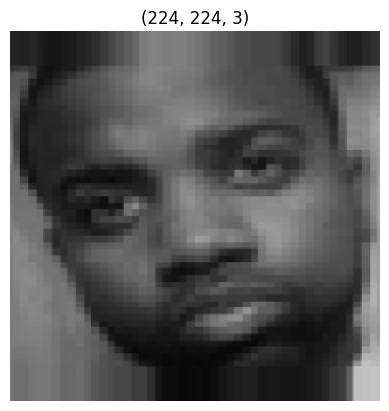

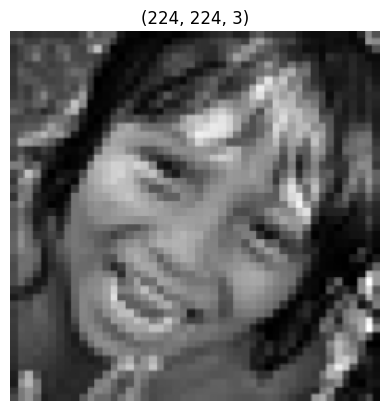

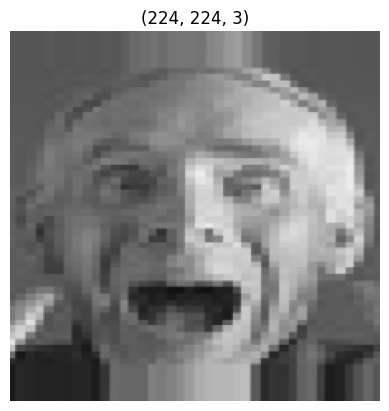

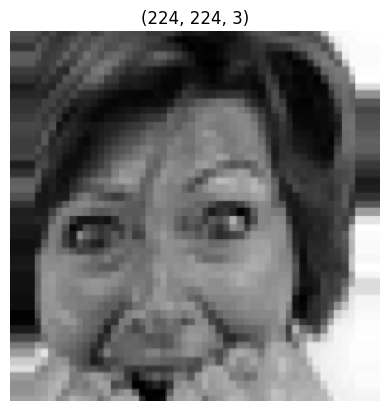

Found 29171 images belonging to 7 classes.
{'Angry': 0, 'Disgust': 1, 'Fear': 2, 'Happy': 3, 'Neutral': 4, 'Surprise': 5, 'Unhappy(Sad)': 6}


C:\Users\asus\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


C:\Users\asus\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


912/912 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step - accuracy: 0.2896 - loss: 1.7747
Epoch 1: val_accuracy improved from -inf to 0.40317, saving model to best_model.keras
912/912 ━━━━━━━━━━━━━━━━━━━━ 507s 554ms/step - accuracy: 0.2896 - loss: 1.7746 - val_accuracy: 0.4032 - val_loss: 1.5338
Epoch 2/50
912/912 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step - accuracy: 0.4024 - loss: 1.5424
Epoch 2: val_accuracy improved from 0.40317 to 0.45545, saving model to best_model.keras
912/912 ━━━━━━━━━━━━━━━━━━━━ 512s 560ms/step - accuracy: 0.4024 - loss: 1.5424 - val_accuracy: 0.4555 - val_loss: 1.4066
Epoch 3/50
912/912 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - accuracy: 0.4543 - loss: 1.4169
Epoch 3: val_accuracy improved from 0.45545 to 0.50166, saving model to best_model.keras
912/912 ━━━━━━━━━━━━━━━━━━━━ 506s 554ms/step - accuracy: 0.4543 - loss: 1.4168 - val_accuracy: 0.5017 - val_loss: 1.2970
Epoch 4/50
912/912 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step - accuracy: 0.4827 - loss: 1.3542
Epoch 4: val_accuracy improved f

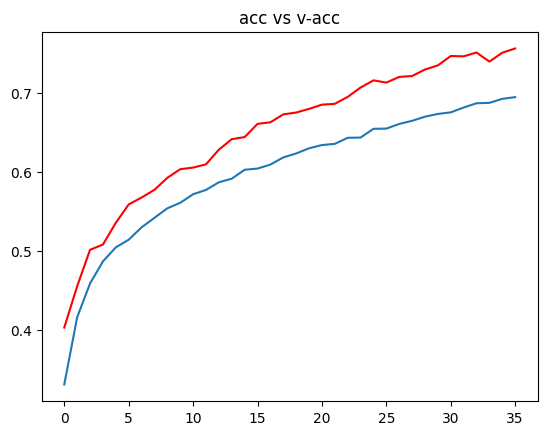

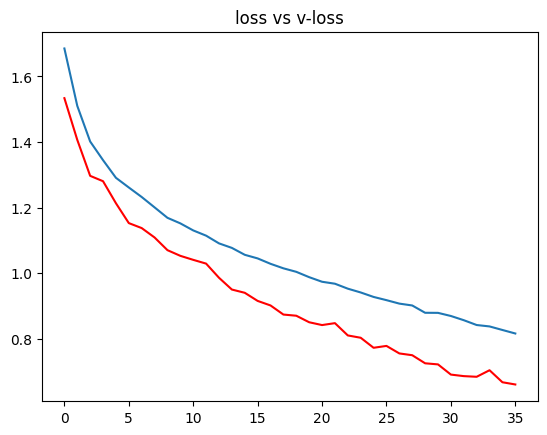

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\asus\\Desktop\\test'

In [7]:
# Import necessary libraries
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np

# Create an instance of ImageDataGenerator for training
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

# Specify the path to the training dataset
train_dir = "C:\\Users\\asus\\Desktop\\train"

# Check if the path exists
if not os.path.exists(train_dir):
    print("Error: The path does not exist:", train_dir)
else:
    # Create a data generator for the training dataset
    train_data = train_datagen.flow_from_directory(directory=train_dir, 
                                                   target_size=(224,224), 
                                                   batch_size=32,
                                                  )
    # Print the class indices
    print(train_data.class_indices)

    # Function to plot the images
    def plotImages(img_arr, label):
      """
      input  :- images array 
      output :- plots the images 
      """
      count = 0
      for im, l in zip(img_arr,label) :
        plt.imshow(im)
        plt.title(im.shape)
        plt.axis('off')
        plt.show()
        
        count += 1
        if count == 10:
          break

    # Get a batch of images and labels from the training data generator
    for t_img, label in train_data:
        # Call the function to plot the images
        plotImages(t_img, label)
        break  # Only plot the first batch

# Create an instance of ImageDataGenerator for validation
val_datagen = ImageDataGenerator(rescale = 1./255)

# Specify the path to the validation dataset
val_dir = "C:\\Users\\asus\\Desktop\\train"

# Check if the path exists
if not os.path.exists(val_dir):
    print("Error: The path does not exist:", val_dir)
else:
    # Create a data generator for the validation dataset
    val_data = val_datagen.flow_from_directory(directory=val_dir, 
                                               target_size=(224,224), 
                                               batch_size=32,
                                              )
    # Print the class indices
    print(val_data.class_indices)

# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(7, activation='softmax'))  # Corrected output shape

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping and model checkpointing
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')
mc = ModelCheckpoint(filepath="best_model.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')
call_back = [es,mc]

# Train the model
hist = model.fit(train_data, 
                 epochs=50, 
                 validation_data=val_data, 
                 callbacks=[es,mc])

# Loading the best fit model 
model = load_model("best_model.keras")

# Plot the accuracy and loss curves
h = hist.history
h.keys()

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

# Map output values
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

# Path for the image to see if it predicts the correct class
path = "C:\\Users\\asus\\Desktop\\test"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])  # Corrected input array

# Make predictions on the test image
predictions = model.predict(input_arr)
print(predictions)